In [2]:
from SparkEdgeEmuLib.connector import EmulatorConnector

In [3]:
connector = EmulatorConnector(usecase='usecase.yaml')

In [4]:
connector.deploy()

Deploy process: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]


In [5]:
spark = connector.create_spark_session("test")

23/08/22 06:58:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [8]:
with connector.timer():
    for i in range(10):
        df = spark.read.parquet("/data/fhvhv_tripdata_2023-01.parquet")
        df.groupBy("DOLocationID").agg({'driver_pay':'avg'}).collect()
        df.groupby('Hvfhs_license_num').agg({'*': 'count'}).collect()
        df.agg({'tips': 'sum'}).collect()

In [9]:
res = connector.get_metrics()

/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:313: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp >= int(Timer.start.timestamp()) * 1000][
/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:313: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp >= int(Timer.start.timestamp()) * 1000][
/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:313: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp >= int(Timer.start.timestamp()) * 1000][
/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:313: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp >= int(Timer.start.timestamp()) * 1000][
/home/jovyan/work/project/SparkEdgeEmuLib/connector.py:313: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.timestamp >= int(Timer.start.timestamp()) * 1000][


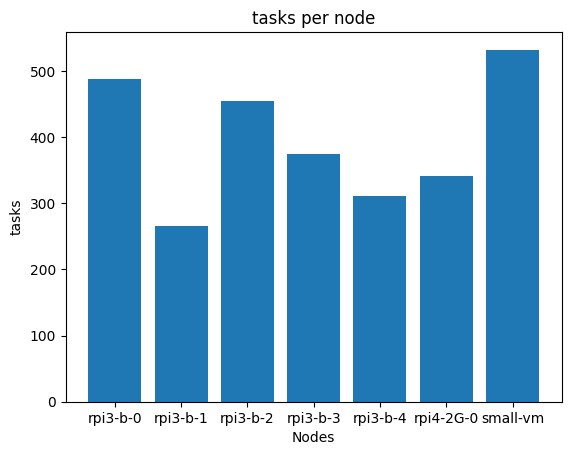

In [18]:
import matplotlib.pyplot as plt
xAxis = []
yAxis = []
name = "tasks"
sorted_nodes = list(res.keys())
sorted_nodes.sort()
for node in sorted_nodes:
    r = res[node]
    xAxis.append(node)
    
    
    if name == "CPU utilization":
        val = r[r['cpu_util']>0].cpu_util.mean()
    if name == "tasks":
        r['tasks'] = -1*r.tasks.diff(periods=-1)
        val = r[r['tasks']>0].tasks.sum()
    if name == "Network Traffic":
        val = (r.network_rx_edge_net + r.network_tx_edge_net).diff().sum()
    if name == "Duration Seconds":
        val = r.duration_seconds.diff().sum()
    if name == "Input Bytes":
        val = r.input_bytes.diff().sum()
    if name == "Shuffle Read":
        val = r.shuffle_read.diff().sum()
    if name == "Shuffle Write":
        val = r.shuffle_write.diff().sum()
    if name == "Used Memory":
        val = r.used_memory.take([-1]).item()
    
    yAxis.append(val)

plt.bar(xAxis,yAxis)
plt.title(f'{name} per node')
plt.xlabel('Nodes')
plt.ylabel(f'{name}')
plt.show()

In [19]:
connector.undeploy()

Undeploy process: 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]
